In [48]:
## Code courtsey: Manav Sehgal (https://www.kaggle.com/startupsci)
## Link to Original Code: https://www.kaggle.com/startupsci/titanic-data-science-solutions

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

def titanic(train, test):
    train_df = pd.read_csv(train)
    test_df = pd.read_csv(test)
    combine = [train_df, test_df]

    train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
    test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
    combine = [train_df, test_df]

    for dataset in combine:
        dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

    pd.crosstab(train_df['Title'], train_df['Sex'])

    for dataset in combine:
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    for dataset in combine:
        dataset['Title'] = dataset['Title'].map(title_mapping)
        dataset['Title'] = dataset['Title'].fillna(0)

    train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
    test_df = test_df.drop(['Name'], axis=1)
    combine = [train_df, test_df]

    for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

    guess_ages = np.zeros((2,3))
    guess_ages

    for dataset in combine:
        for i in range(0, 2):
            for j in range(0, 3):
                guess_df = dataset[(dataset['Sex'] == i) & \
                                      (dataset['Pclass'] == j+1)]['Age'].dropna()

                # age_mean = guess_df.mean()
                # age_std = guess_df.std()
                # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

                age_guess = guess_df.median()

                # Convert random age float to nearest .5 age
                guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

        for i in range(0, 2):
            for j in range(0, 3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                        'Age'] = guess_ages[i,j]

        dataset['Age'] = dataset['Age'].astype(int)

    for dataset in combine:
        dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1



    for dataset in combine:
        dataset['IsAlone'] = 0
        dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

    combine = [train_df, test_df]

    freq_port = train_df.Embarked.dropna().mode()[0]

    for dataset in combine:
        dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

    test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
    
    train_df = pd.get_dummies(train_df)
    test_df  = pd.get_dummies(test_df)

    test_df.head(10)
    return (train_df, test_df)

In [49]:
train = 'train.csv'
test = 'test.csv'
titanic_train,titanic_test = titanic(train, test)

In [50]:
print titanic_test.shape, titanic_train.shape

(418, 13) (891, 13)


In [51]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7.2500,1,2,0,0,0,1
1,1,1,1,38,1,0,71.2833,3,2,0,1,0,0
2,1,3,1,26,0,0,7.9250,2,1,1,0,0,1
3,1,1,1,35,1,0,53.1000,3,2,0,0,0,1
4,0,3,0,35,0,0,8.0500,1,1,1,0,0,1


In [52]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34,0,0,7.8292,1,1,1,0,1,0
1,893,3,1,47,1,0,7.0000,3,2,0,0,0,1
2,894,2,0,62,0,0,9.6875,1,1,1,0,1,0
3,895,3,0,27,0,0,8.6625,1,1,1,0,0,1
4,896,3,1,22,1,1,12.2875,3,3,0,0,0,1


In [53]:
from sklearn import tree

In [54]:
 clf = tree.DecisionTreeClassifier(max_depth=3)

In [55]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [56]:
Y_train = titanic_train['Survived']

In [57]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [58]:
X_train = titanic_train.iloc[:,1:]

In [59]:
X_train.columns

Index([u'Pclass', u'Sex', u'Age', u'SibSp', u'Parch', u'Fare', u'Title',
       u'FamilySize', u'IsAlone', u'Embarked_C', u'Embarked_Q', u'Embarked_S'],
      dtype='object')

In [60]:
X_train.shape

(891, 12)

In [61]:
clf = clf.fit(X_train,Y_train)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
Y_pred = clf.predict(titanic_test.iloc[:,1:])

In [64]:
type(Y_pred)

numpy.ndarray

In [65]:
Y_pred[0:5]

array([0, 1, 0, 0, 1])

In [66]:
from pandas import DataFrame,Series

In [67]:
df1 = DataFrame(np.array([titanic_test.iloc[:,0],Y_pred]).T,columns=['PassengerId','Survived'])

In [68]:
df1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [69]:
df1.shape

(418, 2)

In [70]:
df1.to_csv('prediction.csv',index=False)

In [71]:
def plot_decision_tree(clf,feature_name,target_name):
    from IPython.display import Image 
    from StringIO import StringIO
    import pydotplus
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

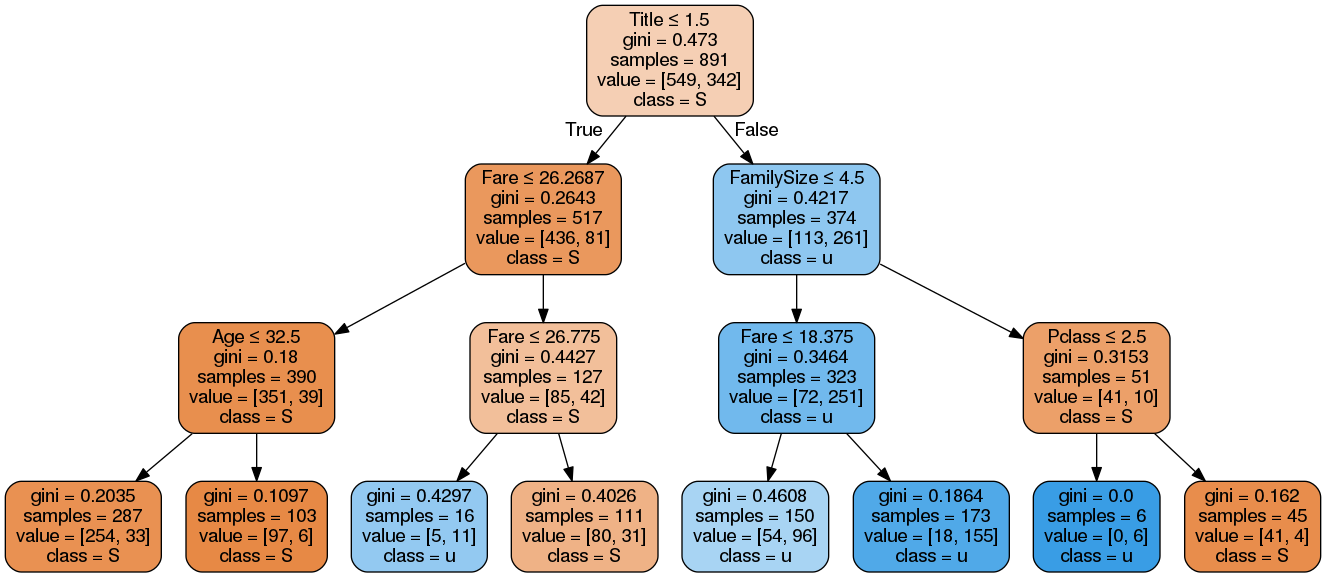

In [72]:
plot_decision_tree(clf,X_train.columns,df1.columns[1])

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [79]:
clf1 = RandomForestClassifier(max_depth=5)

In [80]:
clf1 = clf1.fit(X_train,Y_train)

In [81]:
Y_pred_random_forest = clf1.predict(titanic_test.iloc[:,1:])

In [82]:
df_random = DataFrame(np.array([titanic_test.iloc[:,0],Y_pred_random_forest]).T,columns=['PassengerId','Survived'])
df_random.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [83]:
df_random.to_csv('prediction_random_forest.csv',index=False)